In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [240]:
from sqlalchemy import create_engine

driver = 'mysql+pymysql:'
user = 'root'
password = 'xvoldemortx00'
ip = '35.198.146.55'
database = 'exoplanets'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [241]:
# Importing data from SQL
kepler = pd.read_sql_query(
'''SELECT * FROM kepler
''', engine)

kepler.drop('index', axis=1, inplace=True)

In [242]:
data = pd.read_csv('../datasets/cumulative.csv')
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [243]:
data.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [244]:
data.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk_err1', 
       'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration_err1', 'koi_duration_err2',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq_err1', 'koi_teq_err2',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec'], axis=1, inplace=True)

In [245]:
data.isna().sum()

koi_disposition      0
koi_period           0
koi_time0bk          0
koi_impact         363
koi_duration         0
koi_depth          363
koi_prad           363
koi_teq            363
koi_insol          321
koi_steff          363
koi_slogg          363
koi_srad           363
koi_kepmag           1
dtype: int64

In [246]:
data = data.dropna()

In [247]:
data.shape

(9200, 13)

## High collinearity

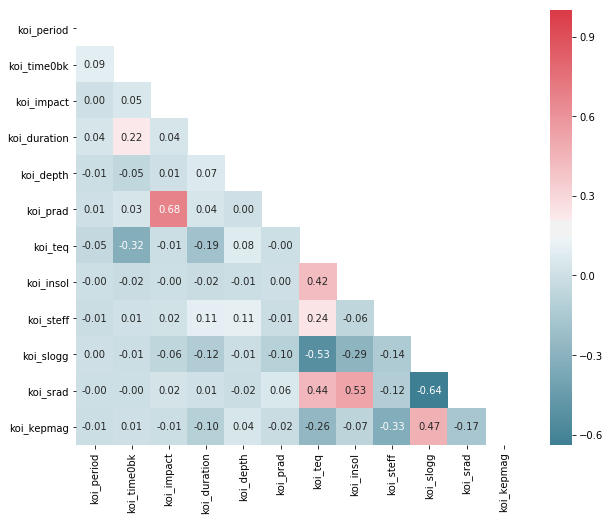

In [248]:
# Looking for high collinearity (>0.9) that could bias our data

corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=mask) 

In [249]:
data.head()

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,CONFIRMED,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,15.347
1,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,15.347
2,FALSE POSITIVE,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,15.436
3,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,15.597
4,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509


### One-Hot Encoding

In [250]:
data = pd.get_dummies(data)
data.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,15.347,0,1,0
1,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,15.347,0,1,0
2,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,15.436,0,0,1
3,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,15.597,0,0,1
4,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509,0,1,0


In [258]:
data.drop(['koi_disposition_CANDIDATE', 'koi_disposition_FALSE POSITIVE'], axis=1, inplace=True)

In [259]:
data.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag,koi_disposition_CONFIRMED
0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,15.347,1
1,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,15.347,1
2,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,15.436,0
3,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,15.597,0
4,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509,1


In [271]:
# Selecting columns 
data2 = data[['koi_period', 'koi_duration', 'koi_prad', 'koi_teq', 'koi_steff', 'koi_srad', 'koi_disposition_CONFIRMED']]
data2.head()


,koi_period,koi_duration,koi_prad,koi_teq,koi_steff,koi_srad,koi_disposition_CONFIRMED
0,9.488036,2.95750,2.26,793.0,5455.0,0.927,1
1,54.418383,4.50700,2.83,443.0,5455.0,0.927,1
2,19.899140,1.78220,14.60,638.0,5853.0,0.868,0
3,1.736952,2.40641,33.46,1395.0,5805.0,0.791,0
4,2.525592,1.65450,2.75,1406.0,6031.0,1.046,1


## 4. Random Forest (with original table)

In [251]:
data.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,15.347,0,1,0
1,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,15.347,0,1,0
2,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,15.436,0,0,1
3,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,15.597,0,0,1
4,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509,0,1,0


In [252]:
y = data['koi_disposition_CONFIRMED'] # What we want to predict
X = data.drop(['koi_disposition_CONFIRMED'], axis = 1)
#X = np.array(X)

In [253]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [254]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [255]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8603260869565217


In [256]:
metrics.confusion_matrix(y_test, y_pred)

array([[1284,  118],
       [ 139,  299]])

In [257]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1402
           1       0.72      0.68      0.70       438

   micro avg       0.86      0.86      0.86      1840
   macro avg       0.81      0.80      0.80      1840
weighted avg       0.86      0.86      0.86      1840



## 4. Random Forest (with selected columns)

In [264]:
data2.head()

,koi_period,koi_duration,koi_prad,koi_teq,koi_steff,koi_srad,koi_disposition_CONFIRMED
0,9.488036,2.95750,2.26,793.0,5455.0,0.927,1
1,54.418383,4.50700,2.83,443.0,5455.0,0.927,1
2,19.899140,1.78220,14.60,638.0,5853.0,0.868,0
3,1.736952,2.40641,33.46,1395.0,5805.0,0.791,0
4,2.525592,1.65450,2.75,1406.0,6031.0,1.046,1


In [265]:
y = data2['koi_disposition_CONFIRMED'] # What we want to predict
X = data2.drop(['koi_disposition_CONFIRMED'], axis = 1)
#X = np.array(X)

In [266]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [267]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [268]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8369565217391305


In [269]:
metrics.confusion_matrix(y_test, y_pred)

array([[1260,  142],
       [ 158,  280]])

In [270]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1402
           1       0.66      0.64      0.65       438

   micro avg       0.84      0.84      0.84      1840
   macro avg       0.78      0.77      0.77      1840
weighted avg       0.83      0.84      0.84      1840

